In [3]:
cd /content/drive/My Drive/Week7 Asssignment

/content/drive/My Drive/Week7 Asssignment


In [4]:
ls

 FireKeras.ipynb     sample_submission.csv   train_df.csv.zip
 FirePytorch.ipynb   submission1_CNN.csv     Untitled0.ipynb
'kaggle (1).json'    test_df.csv             week7_Keras_김효은.ipynb
'kaggle (2).json'    test_df.csv.zip
 kaggle.json         train_df.csv


In [0]:
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록
!chmod 600 ~/.kaggle/kaggle.json
# json 파일 제대로 업로드 됐는지 확인
!ls -1ha kaggle.json
# 본인이 참가한 모든 대회 보기
!kaggle competitions list

ERROR: Operation cancelled by user


In [0]:
# !kaggle competitions download -c tobigs13nn
# !unzip train_df.csv.zip
# !unzip test_df.csv.zip

In [0]:
!pip install -q tensorflow-gpu==2.0.0-rc1

# 1. Load Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test  = pd.read_csv("test_df.csv")

In [8]:
print(train.shape)
print(test.shape)

(42000, 785)
(18000, 785)


In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# scaling
X_train = train.iloc[:, 1:].values / 255.0
X_test  = test.iloc[:, 1:].values / 255.0
y_train = train['label']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

In [13]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(29400, 784) (12600, 784)
(29400,) (12600,)


In [14]:
print(y_train.value_counts()/y_train.shape[0])
print(y_val.value_counts()/y_val.shape[0])

3    0.101088
4    0.100782
7    0.100680
0    0.100034
1    0.099898
6    0.099830
8    0.099524
5    0.099456
2    0.099456
9    0.099252
Name: label, dtype: float64
3    0.101111
4    0.100714
7    0.100635
0    0.100079
1    0.099921
6    0.099841
8    0.099524
5    0.099444
2    0.099444
9    0.099286
Name: label, dtype: float64


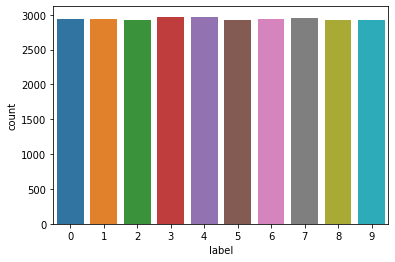

In [15]:
sns.countplot(y_train)

# 2. Modeling

## 1) Dense + Activation(selu) + Nadam

In [16]:
import keras

Using TensorFlow backend.


In [0]:
from keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.optimizers import Nadam, Adam

In [18]:
input_shape = 784
num_classes = 10

model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(512))
model.add(Activation('selu'))
model.add(Dropout(rate=0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(128))
model.add(Dropout(rate=0.2))
model.add(Activation('selu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optim = Nadam(lr=0.0001)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_12 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_19 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)              

In [57]:
history = model.fit(X_train, y_train, epochs=400, batch_size=5000, validation_data=(X_val, y_val))

Train on 29400 samples, validate on 12600 samples
Epoch 1/400
29400/29400 [==============================] - 2s 75us/step - loss: 2.0407 - acc: 0.3230 - val_loss: 1.0409 - val_acc: 0.6812
Epoch 2/400
29400/29400 [==============================] - 0s 13us/step - loss: 1.0370 - acc: 0.6817 - val_loss: 0.5734 - val_acc: 0.8386
Epoch 3/400
29400/29400 [==============================] - 0s 13us/step - loss: 0.6679 - acc: 0.8153 - val_loss: 0.3984 - val_acc: 0.8882
Epoch 4/400
29400/29400 [==============================] - 0s 13us/step - loss: 0.4965 - acc: 0.8691 - val_loss: 0.3151 - val_acc: 0.9142
Epoch 5/400
29400/29400 [==============================] - 0s 13us/step - loss: 0.4102 - acc: 0.8945 - val_loss: 0.2674 - val_acc: 0.9271
Epoch 6/400
29400/29400 [==============================] - 0s 13us/step - loss: 0.3524 - acc: 0.9115 - val_loss: 0.2366 - val_acc: 0.9349
Epoch 7/400
29400/29400 [==============================] - 0s 13us/step - loss: 0.3142 - acc: 0.9227 - val_loss: 0.2152 - 

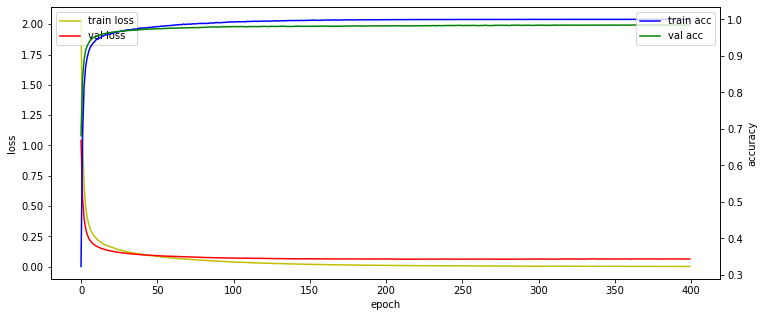

In [58]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 2) Dense + Activation(selu) + Adam
- Nadam Optimizer보다 accuracy 하락, loss 상승

In [0]:
input_shape = 784
num_classes = 10

model2 = Sequential()
model2.add(Dense(1024, input_shape=(784,)))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.1))
model2.add(Activation('selu'))

model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.1))
model2.add(Activation('selu'))


model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.1))
model2.add(Activation('selu'))

model2.add(Dense(258))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.1))
model2.add(Activation('selu'))

model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.1))
model2.add(Activation('selu'))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [0]:
optim = Adam()
model2.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
history2 = model2.fit(X_train, y_train, epochs=400, batch_size=5000, validation_data=(X_val, y_val))

Train on 29400 samples, validate on 12600 samples
Epoch 1/400
29400/29400 [==============================] - 3s 99us/step - loss: 0.8958 - acc: 0.7328 - val_loss: 0.2383 - val_acc: 0.9293
Epoch 2/400
29400/29400 [==============================] - 0s 15us/step - loss: 0.2323 - acc: 0.9351 - val_loss: 0.1660 - val_acc: 0.9525
Epoch 3/400
29400/29400 [==============================] - 0s 15us/step - loss: 0.1768 - acc: 0.9514 - val_loss: 0.1458 - val_acc: 0.9563
Epoch 4/400
29400/29400 [==============================] - 0s 15us/step - loss: 0.1527 - acc: 0.9585 - val_loss: 0.1290 - val_acc: 0.9621
Epoch 5/400
29400/29400 [==============================] - 0s 15us/step - loss: 0.1352 - acc: 0.9636 - val_loss: 0.1183 - val_acc: 0.9653
Epoch 6/400
29400/29400 [==============================] - 0s 15us/step - loss: 0.1221 - acc: 0.9673 - val_loss: 0.1088 - val_acc: 0.9680
Epoch 7/400
29400/29400 [==============================] - 0s 15us/step - loss: 0.1126 - acc: 0.9696 - val_loss: 0.1042 - 

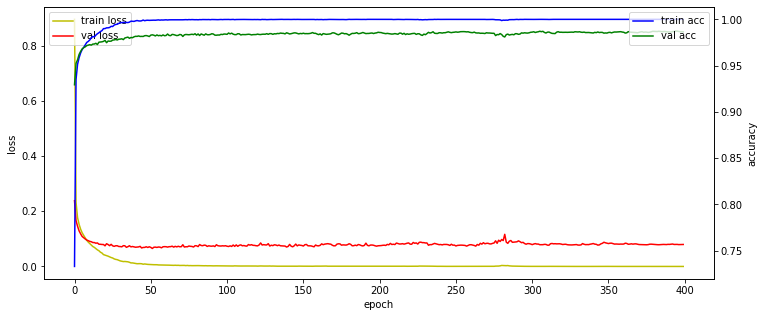

In [62]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history2.history['acc'], 'b', label='train acc')
acc_ax.plot(history2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 3) Conv + Pooling + Nadam

In [0]:
X_train_CNN = X_train.reshape(-1,28,28,1)
X_val_CNN = X_val.reshape(-1,28,28,1)

In [14]:
print(X_train_CNN.shape)
print(X_val_CNN.shape)

(29400, 28, 28, 1)
(12600, 28, 28, 1)


https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

In [0]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model3.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))


model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(256, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation = "softmax"))

In [0]:
optim = Nadam(lr=0.0002)
model3.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
history3 = model3.fit(X_train_CNN, y_train, epochs=200, batch_size=5000, validation_data=(X_val_CNN, y_val))

Train on 29400 samples, validate on 12600 samples
Epoch 1/200
29400/29400 [==============================] - 7s 224us/step - loss: 2.2687 - acc: 0.2030 - val_loss: 2.1529 - val_acc: 0.6112
Epoch 2/200
29400/29400 [==============================] - 4s 147us/step - loss: 1.8673 - acc: 0.4464 - val_loss: 1.2167 - val_acc: 0.6287
Epoch 3/200
29400/29400 [==============================] - 4s 147us/step - loss: 1.1713 - acc: 0.6017 - val_loss: 0.7052 - val_acc: 0.7682
Epoch 4/200
29400/29400 [==============================] - 4s 147us/step - loss: 0.7712 - acc: 0.7385 - val_loss: 0.3882 - val_acc: 0.8910
Epoch 5/200
29400/29400 [==============================] - 4s 146us/step - loss: 0.5499 - acc: 0.8159 - val_loss: 0.2951 - val_acc: 0.9116
Epoch 6/200
29400/29400 [==============================] - 4s 147us/step - loss: 0.4382 - acc: 0.8588 - val_loss: 0.2271 - val_acc: 0.9353
Epoch 7/200
29400/29400 [==============================] - 4s 149us/step - loss: 0.3503 - acc: 0.8882 - val_loss: 0.

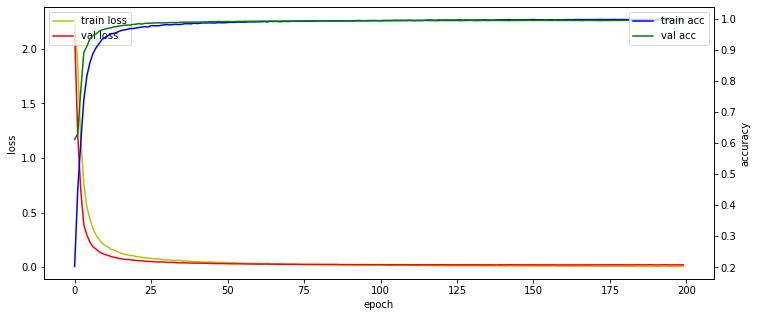

In [88]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 4) Conv + Pooling + Nadam
- accuracy가 0.995에서 더 높아지지 않음

In [0]:
model4 = Sequential()

model4.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model4.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Dropout(0.2))


model4.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model4.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model4.add(Dropout(0.2))


model4.add(Flatten())
model4.add(Dense(256, activation = "relu"))
model4.add(Dropout(0.3))
model4.add(Dense(10, activation = "softmax"))

In [0]:
optim = Nadam(lr=0.0005)
model4.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history4 = model4.fit(X_train_CNN, y_train, epochs=300, batch_size=5000, validation_data=(X_val_CNN, y_val))

Train on 29400 samples, validate on 12600 samples
Epoch 1/300
29400/29400 [==============================] - 3s 112us/step - loss: 2.1668 - acc: 0.3701 - val_loss: 1.6444 - val_acc: 0.6296
Epoch 2/300
29400/29400 [==============================] - 3s 94us/step - loss: 1.3993 - acc: 0.5685 - val_loss: 0.9864 - val_acc: 0.6998
Epoch 3/300
29400/29400 [==============================] - 3s 93us/step - loss: 0.8067 - acc: 0.7487 - val_loss: 0.4842 - val_acc: 0.8512
Epoch 4/300
29400/29400 [==============================] - 3s 93us/step - loss: 0.4768 - acc: 0.8454 - val_loss: 0.3472 - val_acc: 0.8944
Epoch 5/300
29400/29400 [==============================] - 3s 93us/step - loss: 0.3811 - acc: 0.8765 - val_loss: 0.2539 - val_acc: 0.9264
Epoch 6/300
29400/29400 [==============================] - 3s 94us/step - loss: 0.3191 - acc: 0.8986 - val_loss: 0.2074 - val_acc: 0.9413
Epoch 7/300
29400/29400 [==============================] - 3s 93us/step - loss: 0.2454 - acc: 0.9259 - val_loss: 0.1783 -

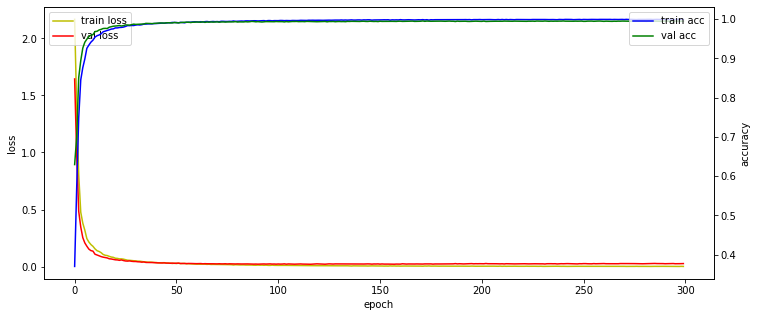

In [24]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history4.history['loss'], 'y', label='train loss')
loss_ax.plot(history4.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history4.history['acc'], 'b', label='train acc')
acc_ax.plot(history4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 5) Conv + Pooling + Nadam

In [0]:
model5 = Sequential()

model5.add(Conv2D( input_shape=(28, 28, 1), kernel_size=(3, 3), filters=64, strides=(1, 1), padding='same', activation='relu'))
model5.add(Conv2D(kernel_size=(3, 3), filters=64, strides=(1, 1), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model5.add(Conv2D(kernel_size=(3, 3), filters=128, strides=(1, 1), padding='same', activation='relu'))
model5.add(Conv2D(kernel_size=(3, 3), filters=128, strides=(1, 1), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model5.add(Conv2D(kernel_size=(3, 3), filters=256, strides=(1, 1), padding='same', activation='relu'))
model5.add(Conv2D(kernel_size=(3, 3), filters=256, strides=(1, 1), padding='same', activation='relu'))
model5.add(Conv2D(kernel_size=(3, 3), filters=256, strides=(1, 1), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model5.add(Conv2D(kernel_size=(3, 3), filters=512, strides=(1, 1), padding='same', activation='relu'))
model5.add(Conv2D(kernel_size=(3, 3), filters=512, strides=(1, 1), padding='same', activation='relu'))
model5.add(Conv2D(kernel_size=(3, 3), filters=512, strides=(1, 1), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model5.add(Flatten())
model5.add(Dense(units=4096, activation='relu'))
model5.add(Dense(units=4096, activation='relu'))
model5.add(Dense(units=1000, activation='relu'))
model5.add(Dense(units=10, activation='softmax'))

In [0]:
optim = Nadam(lr=0.0001)
model5.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history5 = model5.fit(X_train_CNN, y_train, epochs=200, batch_size=2000, validation_data=(X_val_CNN, y_val), workers=-1)

Train on 29400 samples, validate on 12600 samples
Epoch 1/200
29400/29400 [==============================] - 11s 390us/step - loss: 1.7464 - acc: 0.4742 - val_loss: 0.9745 - val_acc: 0.7272
Epoch 2/200
29400/29400 [==============================] - 11s 389us/step - loss: 0.8932 - acc: 0.6687 - val_loss: 0.6111 - val_acc: 0.7367
Epoch 3/200
29400/29400 [==============================] - 11s 390us/step - loss: 0.4535 - acc: 0.8318 - val_loss: 0.4040 - val_acc: 0.8580
Epoch 4/200
29400/29400 [==============================] - 12s 393us/step - loss: 0.2629 - acc: 0.9136 - val_loss: 0.2717 - val_acc: 0.9040
Epoch 5/200
29400/29400 [==============================] - 12s 393us/step - loss: 0.2166 - acc: 0.9296 - val_loss: 0.2406 - val_acc: 0.9182
Epoch 6/200
29400/29400 [==============================] - 12s 398us/step - loss: 0.1832 - acc: 0.9415 - val_loss: 0.1295 - val_acc: 0.9598
Epoch 7/200
29400/29400 [==============================] - 12s 396us/step - loss: 0.1122 - acc: 0.9634 - val_l

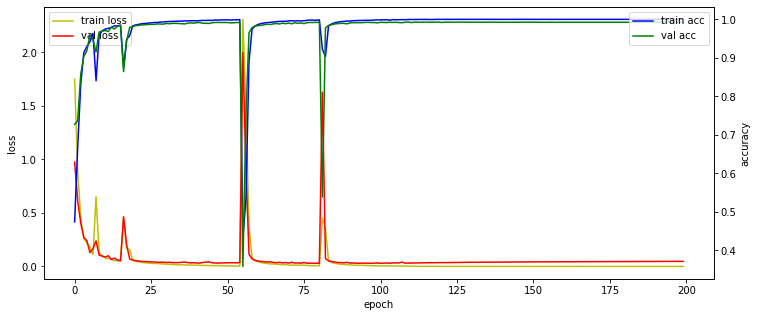

In [30]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history5.history['loss'], 'y', label='train loss')
loss_ax.plot(history5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history5.history['acc'], 'b', label='train acc')
acc_ax.plot(history5.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [0]:
X_test_CNN = X_test.reshape(-1,28,28,1)

In [0]:
prediction = model3.predict_classes(X_test_CNN)

In [93]:
prediction[:10]

array([8, 0, 5, 3, 8, 1, 9, 6, 6, 0])

In [0]:
sample_submission['Category'] = prediction

In [0]:
sample_submission.to_csv("submission1_CNN.csv", index=False)

In [0]:
prediction = model5.predict_classes(X_test_CNN)

In [35]:
prediction[:10]

array([8, 0, 5, 3, 8, 1, 9, 6, 6, 0])

In [0]:
sample_submission['Category'] = prediction
sample_submission.to_csv("submission2_CNN.csv", index=False)

---